### Welcome

If you want to see my code repositories, please visit - https://github.com/HiteshG

##### Classification of newspaper articles - Unsupervised Learning using K-means algorithm

### Setup for the work

In [1]:
#Necessary libraries 
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Read dataset
from google.colab import drive 
drive.mount('/content/gdrive')

data=pd.read_json("gdrive/My Drive/Colab Notebooks/CNN/TOI_HIV_data(2010-2018).json",lines=True)
data.head()

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


,article,day,link,month,title,year
0,"NEW DELHI: To provide relief to HIV patients, ...",8,https://timesofindia.indiatimes.com//city/delh...,1,Delhi govt to announce facilities for HIV/AIDS...,2010
1,"Junali Devi, a widow living in Assam, is eager...",8,https://timesofindia.indiatimes.com//life-styl...,1,Special marriage website excites HIV + people,2010
2,CHENNAI: Researchers working towards a cure fo...,11,https://timesofindia.indiatimes.com//city/chen...,1,Researchers hopeful of finding HIV cure,2010
3,LUCKNOW: After running from the pillar to post...,12,https://timesofindia.indiatimes.com//city/luck...,1,"Dumped by husband, HIV+ woman seeks CM’s help",2010
4,"SURAT: Muskaan, a non government organisation ...",17,https://timesofindia.indiatimes.com//city/sura...,1,NGO distributes hearing aids,2010


In [ ]:
# Extracting Extra Features from the URL link : Getting the category and subcategory of reports
category = []
subtype = []
for i in range(0,len(data)):
    link = data['link'][i]
    words = link.split('/')
    cat = words[4]
    sub = words[5]
    category.append(cat)
    subtype.append(sub)

In [ ]:
data['category'] = category
data['subcategory'] = subtype
data.head()

,article,day,link,month,title,year,category,subcategory
0,"NEW DELHI: To provide relief to HIV patients, ...",8,https://timesofindia.indiatimes.com//city/delh...,1,Delhi govt to announce facilities for HIV/AIDS...,2010,city,delhi
1,"Junali Devi, a widow living in Assam, is eager...",8,https://timesofindia.indiatimes.com//life-styl...,1,Special marriage website excites HIV + people,2010,life-style,relationships
2,CHENNAI: Researchers working towards a cure fo...,11,https://timesofindia.indiatimes.com//city/chen...,1,Researchers hopeful of finding HIV cure,2010,city,chennai
3,LUCKNOW: After running from the pillar to post...,12,https://timesofindia.indiatimes.com//city/luck...,1,"Dumped by husband, HIV+ woman seeks CM’s help",2010,city,lucknow
4,"SURAT: Muskaan, a non government organisation ...",17,https://timesofindia.indiatimes.com//city/sura...,1,NGO distributes hearing aids,2010,city,surat


### Preprocessing

In [ ]:
# Major steps in pre-processing are:
# 1. Null values should be handle
# 2. Remove duplicacy and present only unique data points.

In [ ]:
# Initial info about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1566 entries, 0 to 1565
Data columns (total 8 columns):
article        1566 non-null object
day            1566 non-null int64
link           1566 non-null object
month          1566 non-null int64
title          1566 non-null object
year           1566 non-null int64
category       1566 non-null object
subcategory    1566 non-null object
dtypes: int64(3), object(5)
memory usage: 150.1+ KB


#### Removing for  null attr data points

In [ ]:
# As every column has 1566 entry and non-null values, then no need to use .drop_na() or to handle this condition.

#### Removing the Duplicacy from DataSet 

In [ ]:
# Initial size of DataSet
initialSize = data.shape[0]
initialSize

1566

In [ ]:
# Checking for duplication in all column fields.
reduceSize = data.duplicated().map({True: 'Duplicated', False : 'Unique'}).value_counts()
print(reduceSize)
if (reduceSize.Unique == initialSize):
    print(" *******************              NO DUPLICACY IN DATASET                  ************************")

Unique    1566
dtype: int64
 *******************              NO DUPLICACY IN DATASET                  ************************


In [ ]:
# As duly noticed dataset have same size after checking for duplication in all the column fields. 
# But,there are data points where article, day, month, year is same but link and article's title are different
# So, need to remove these data duplicacy points from dataset
# So it's better to see data duplicacy in following fields : [day,month,year,title]

In [ ]:
data = data.drop_duplicates(subset = ['day','month','year','title'] , keep= 'last')
data.duplicated(subset = ['day','month','year','title']).map({True : 'Duplicated', False : 'Unique'})
print(data.shape[0])
if (data.shape[0] == initialSize):
    print(" *******************               NO DUPLICACY IN DATASET           ************************")
else:
    print(" *******************               Duplicacy Removed                 ************************")


1534
 *******************               Duplicacy Removed                 ************************


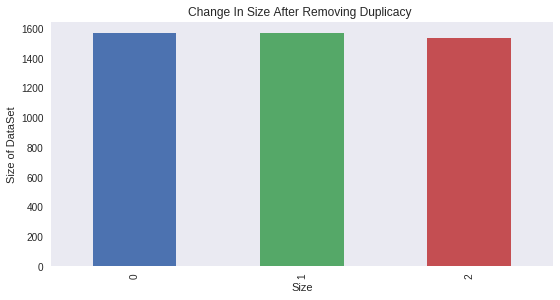

In [ ]:
# Representation Of Change In Size
plt.figure(figsize= (9,4.5))
countSize = [initialSize,reduceSize.Unique,data.shape[0]]
countSize = pd.Series(countSize)
countSize.plot(kind = 'bar')
plt.ylabel("Size of DataSet")
plt.xlabel('Size')
plt.title('Change In Size After Removing Duplicacy ')
plt.grid()

### Basic Insights

#### Reports per year

Text(0.5,1,'Reports per Year')

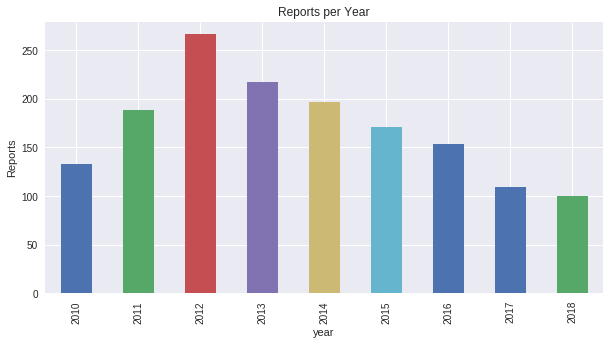

In [ ]:
# Reports per year
plt.figure(figsize=(10,5))
data.groupby('year')['article'].count().plot(kind = 'bar')
plt.ylabel("Reports")
plt.title('Reports per Year')

In [ ]:
#Observation : Maximum 'hiv/aids' reported on year 2012 and then year by year it decreases.

#### Distribution around articles

Text(0.5,1,'Articles per Category')

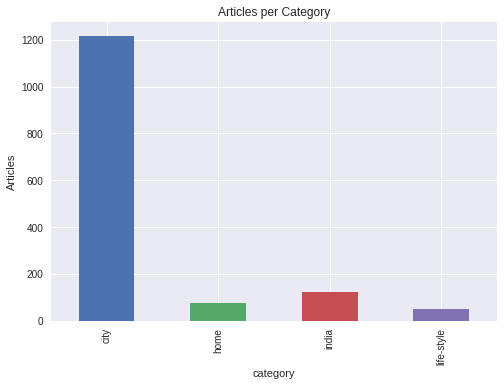

In [ ]:
# Articles per Category
d = data.groupby('category')['article'].count()
index = d.apply(lambda x: True if x > 30 else False)
d[index].plot(kind='bar')
plt.ylabel('Articles')
plt.title('Articles per Category')

In [ ]:
# Major HIV/AIDS reports were reported in City section of Newspaper

#### Distribution by cities

Text(0.5,1,'Reports per City')

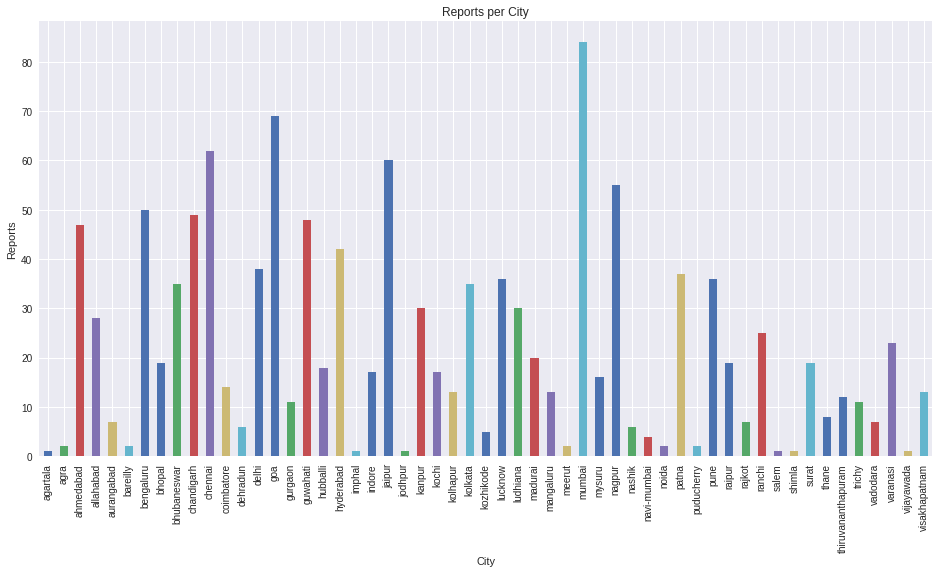

In [ ]:
# Cities Plot
plt.figure(figsize= (16,8))
city = data[data['category'] == 'city']
city.groupby('subcategory')['article'].count().plot(kind = 'bar')
plt.xlabel('City')
plt.ylabel('Reports')
plt.title('Reports per City')

In [ ]:
# Highest HIV/AID reports : Mumbai (84)
# Lowest HIV/AID reports : Agartala, Imphal, Jodhpur, Shimla, Salem, Vijaywada (1)

### Text Processing 

#### Text pre-processing

In [ ]:
# Dataframe with only title and article of report
TextData = pd.DataFrame(data['title']+" "+data['article'] , columns=['text'])
TextData.head()

,text
0,Delhi govt to announce facilities for HIV/AIDS...
1,Special marriage website excites HIV + people ...
2,Researchers hopeful of finding HIV cure CHENNA...
3,"Dumped by husband, HIV+ woman seeks CM’s help ..."
4,"NGO distributes hearing aids SURAT: Muskaan, a..."


In [ ]:
# NLP libraries
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
corpus = []
for i in range(0, len(TextData)):
    t =  re.sub('[^a-zA-Z]',' ', TextData.iloc[i]['text'])
    t = t.lower().split()
    t = [word for word in t if not word in stopwords]
    t = ' '.join(t)
    corpus.append(t)

In [ ]:
changeData = pd.DataFrame(corpus ,columns=['text'])
changeData.head()

,text
0,delhi govt announce facilities hiv aids patien...
1,special marriage website excites hiv people ju...
2,researchers hopeful finding hiv cure chennai r...
3,dumped husband hiv woman seeks cm help lucknow...
4,ngo distributes hearing aids surat muskaan non...


#### TfidfVectorizer 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Taking min_df = 6 and look up 3 continous words ngram_range(1,3)

vectorizer = TfidfVectorizer(min_df= 6,stop_words='english', ngram_range=(1,3))
tfidf_matrix = vectorizer.fit_transform(changeData['text'])
X = tfidf_matrix

In [ ]:
# Top features from whole document
features = vectorizer.get_feature_names()
featureArray = np.array(features)
SortedIndex = np.argsort(tfidf_matrix.toarray()).flatten()[::-1]
top_n = 50
top_n = featureArray[SortedIndex][:top_n]
print(top_n)

['court' 'trial' 'trial court' 'mystery' 'children home' 'noted' 'child'
 'high court' 'accused' 'shankar' 'justice' 'sexually assaulted'
 'repeatedly' 'sexual contact' 'assaulted' 'guard' 'hiv virus' 'minor'
 'jail' 'home' 'room' 'boy' 'partner' 'contact' 'sexually' 'hiv' 'high'
 'transmitted' 'children' 'virus' 'sexual' 'man' 'multiple times'
 'apparent' 'entirely' 'mother died' 'verdict' 'secondly' 'convicted'
 'delhi' 'underlined' 'terming' 'sleeping' 'tears' 'security guard'
 'convict' 'virus transmitted' 'child hiv positive' 'day day' 'entered']


#### K-means clustering

In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

In [ ]:
print("Performing dimensionality reduction using LSA")

# Vectorizer results are normalized, which makes KMeans behave as
# spherical k-means for better results. Since LSA/SVD results are
# not normalized, we have to redo the normalization.

svd = TruncatedSVD(n_components=300, random_state=0)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)
X = lsa.fit_transform(X)

Performing dimensionality reduction using LSA


In [ ]:
from sklearn.cluster import KMeans, MiniBatchKMeans

In [ ]:
km = MiniBatchKMeans(n_clusters=5, init='k-means++', n_init=1,
                    init_size=1000, batch_size=1000)

In [ ]:
clusters = km.fit_predict(X)

In [ ]:
changeData['groups']=clusters
changeData.head()

,text,groups
0,delhi govt announce facilities hiv aids patien...,2
1,special marriage website excites hiv people ju...,1
2,researchers hopeful finding hiv cure chennai r...,0
3,dumped husband hiv woman seeks cm help lucknow...,1
4,ngo distributes hearing aids surat muskaan non...,0


In [ ]:
data['groups'] = clusters

#### Words per Clusters

In [ ]:
print("Top terms per cluster:")
print()

original_space_centroids = svd.inverse_transform(km.cluster_centers_)
order_centroids = original_space_centroids.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
l = ['first','second','third','fourth','fifth','sixth']
for i in range(0,5):
    print(l[i],"Cluster top words:", end='')
    w = []
    for ind in order_centroids[i, :30]:
        w.append(terms[ind])
    
    print(w)
    print()

Top terms per cluster:

first Cluster top words:['hiv', 'aids', 'said', 'virus', 'blood', 'awareness', 'people', 'india', 'students', 'hiv aids', 'vaccine', 'new', 'world', 'health', 'test', 'patients', 'cells', 'infection', 'dr', 'scientists', 'research', 'researchers', 'day', 'infected', 'university', 'drug', 'hepatitis', 'team', 'testing', 'disease']

second Cluster top words:['hiv', 'children', 'aids', 'positive', 'people', 'said', 'hiv positive', 'hiv aids', 'women', 'school', 'state', 'life', 'living', 'says', 'parents', 'year', 'awareness', 'government', 'years', 'disease', 'infected', 'child', 'district', 'health', 'living hiv', 'kids', 'affected', 'society', 'stigma', 'discrimination']

third Cluster top words:['patients', 'hiv', 'art', 'centre', 'aids', 'said', 'centres', 'treatment', 'positive', 'state', 'hospital', 'hiv positive', 'people', 'cases', 'art centres', 'district', 'hiv patients', 'government', 'line', 'number', 'art centre', 'drugs', 'control', 'medicines', 'the

#### Clusters observed

In [ ]:
# 1 cluster : Research related cases
# 2 cluster : Awareness/Goverment programme
# 3 cluster : Treatment centers/Facilities 
# 4 cluster : Blood Transfusion/Complaint
# 5 cluster : General cases/Risk groups

#### Plot of Clusters

Text(0.5,1,'K-means clusters of the news documents')

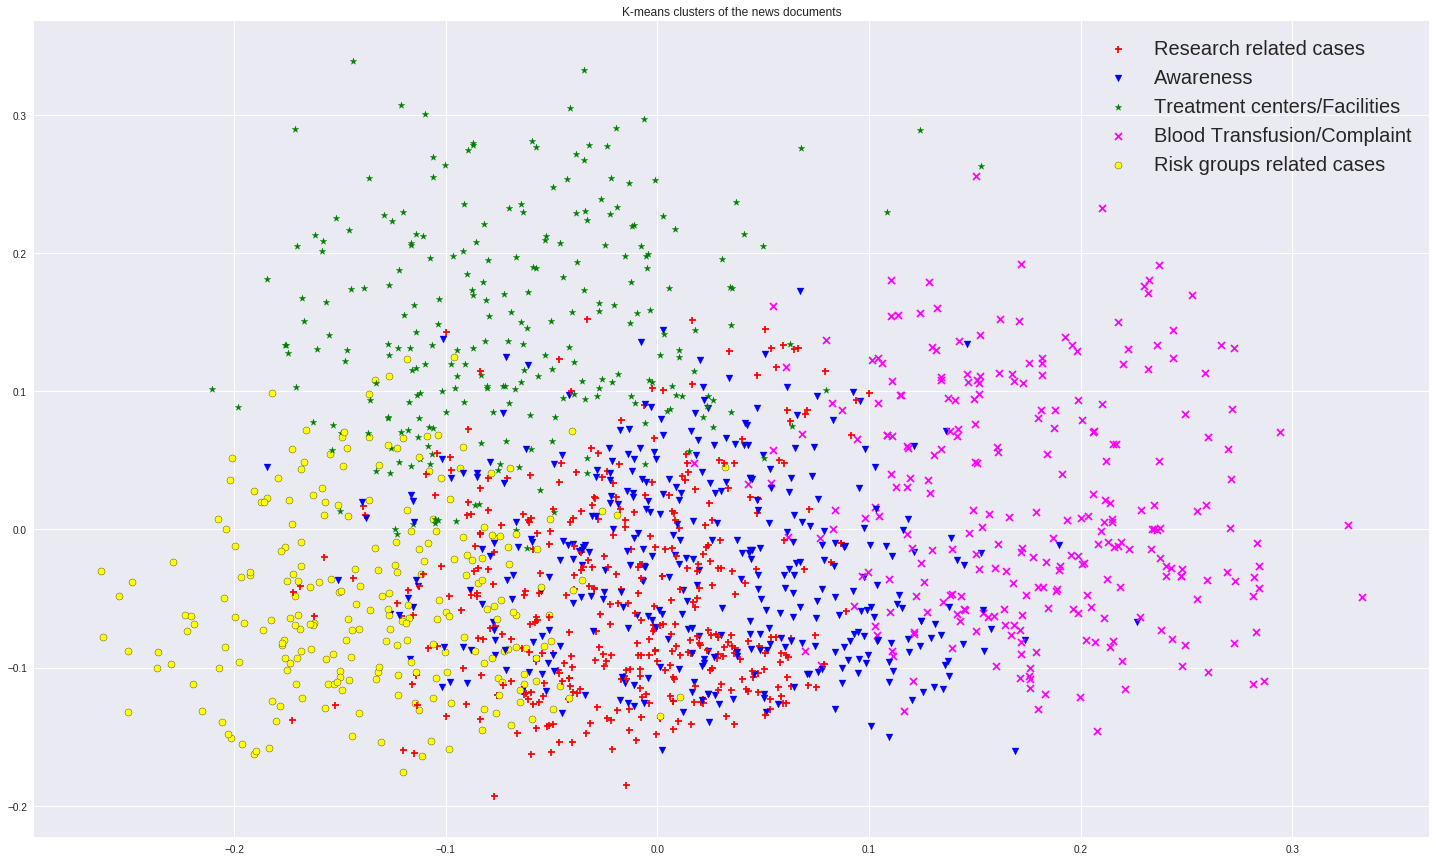

In [ ]:
# PLOT
from sklearn.decomposition import PCA
import pylab as pl
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,15))
pca = PCA(n_components=2).fit(tfidf_matrix.todense())  #convert sparse tf-idf to dense (matrix) form 
data2D = pca.transform(tfidf_matrix.todense())  # get 2-D representation 
for i in range(0, data2D.shape[0]):  #plot PCA ,get the row shape of data2D
    if km.labels_[i] == 0:
        c0 = plt.scatter(data2D[i,0],data2D[i,1],c='red', marker='+')
    elif km.labels_[i] == 1:
        c1 = plt.scatter(data2D[i,0],data2D[i,1],c='blue',marker='v')
    elif km.labels_[i] == 2:
        c2 = plt.scatter(data2D[i,0],data2D[i,1],c='green',marker='*')
    elif km.labels_[i] == 3:
        c3 = plt.scatter(data2D[i,0],data2D[i,1],c='magenta',marker='x')
    elif km.labels_[i] == 4:
        c4 = plt.scatter(data2D[i,0],data2D[i,1],c='yellow',marker='o',edgecolors= 'black')    
        
pl.legend([c0, c1, c2, c3, c4],["Research related cases","Awareness","Treatment centers/Facilities","Blood Transfusion/Complaint","Risk groups related cases"],prop={'size': 20})
pl.title('K-means clusters of the news documents') 

### Observations 

#### Reports per Group

                   Reports per Group         



Text(0.5,1,'Reports per group')

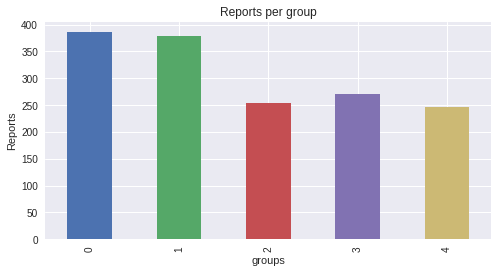

In [ ]:
# Reports per Group
print("                   Reports per Group         ")
print()
changeData.groupby('groups')['text'].count().plot(kind = 'bar' ,figsize =(8,4))
plt.ylabel('Reports')
plt.title('Reports per group')

In [4]:
# Highest reports : Research related cases
# Lowest reports : General cases/Risk groups

#### Group-wise reports per Year

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


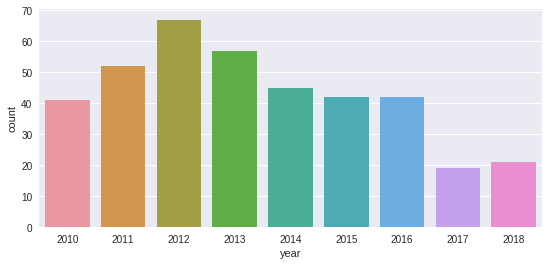

In [ ]:
# General - Cases/Risk groups had highest reports in year 2012 and lowest in year 2017
plt.figure(figsize=(9,4))
sns.countplot(x ='year' ,data= data[data.groups == 0])

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


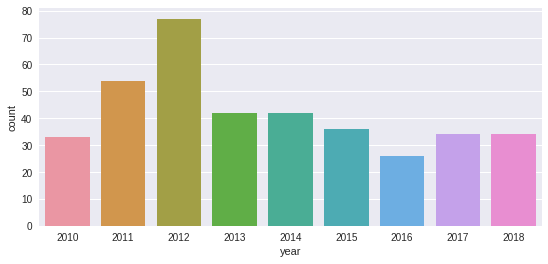

In [ ]:
# Group -  Awareness/Goverment programme had highest reports in 2012 whereas lowest in year 2016
plt.figure(figsize=(9,4))
sns.countplot(x ='year' ,data= data[data.groups == 1])

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


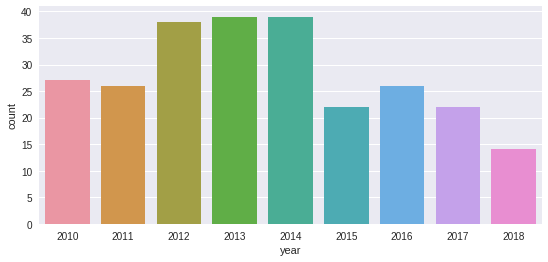

In [ ]:
# Group - Treatment centers/Facilities had highest reports in 2013 however 2012 and 2014 both had somewhat similar numbers.
# Whereas the lowest in year 2018
plt.figure(figsize=(9,4))
sns.countplot(x ='year' ,data= data[data.groups == 2])

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


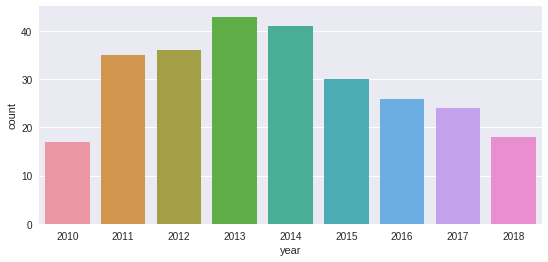

In [ ]:
# Group- Blood Transfusion/Complaint had highest reports in 2013 whereas lowest in year 2010
plt.figure(figsize=(9,4))
sns.countplot(x ='year' ,data= data[data.groups == 3])

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


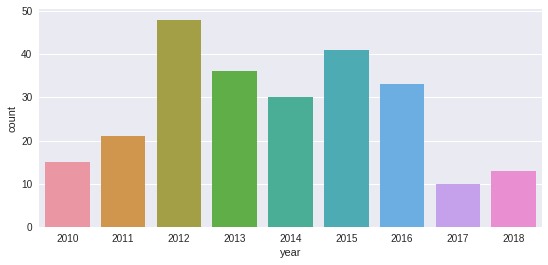

In [ ]:
# Group - General cases/Risk groups had highest reports in 2012 whereas lowest in year 2017
plt.figure(figsize=(9,4))
sns.countplot(x ='year' ,data= data[data.groups == 4])